# Bias correction of numerical prediction model temperature forecast Data Set

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df=pd.read_csv("Bias_correction_ucl.csv")
df.head()

# We have 2 targets - 'Next_Tmax' & 'Next_Tmin'

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(7588, 25)

In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [7]:
df.describe(include=['O'])
# Let's drop date feature

,Date
count,7588
unique,307
top,2013-07-01
freq,25


In [8]:
df.drop('Date',axis=1,inplace=True)

In [9]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

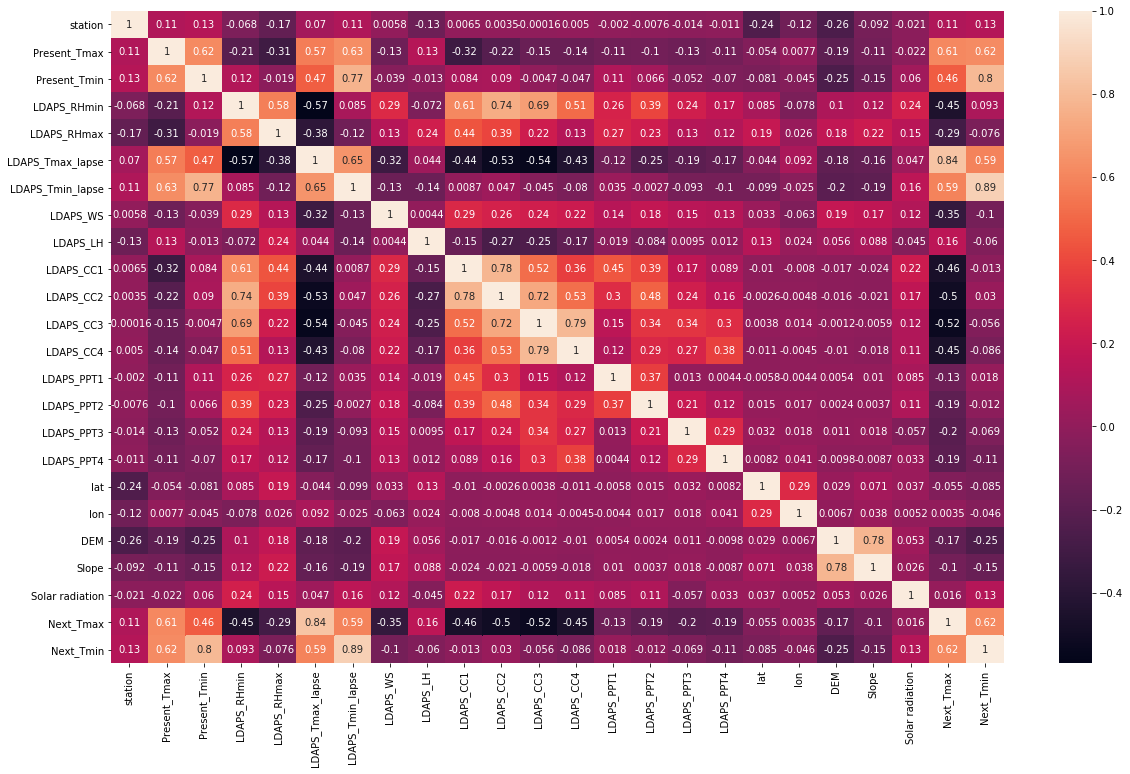

In [10]:
# Let's have a look at the correlation
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
# We can use PCA later to reduce some dimensionality

In [15]:
# Let's see the mean of our target variables Next_Tmax and Next_Tmin
df['Next_Tmax'].mean(), df['Next_Tmin'].mean()

(30.241526093832377, 22.910819715340047)

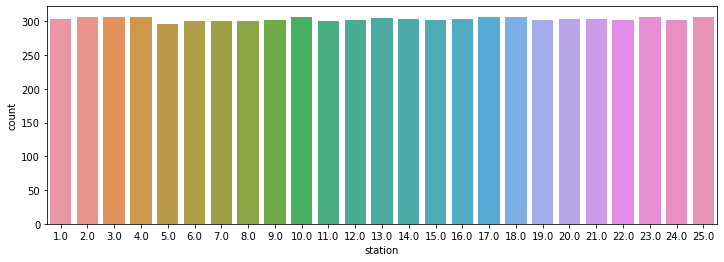

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(df['station'])
# All stations seem to be equal

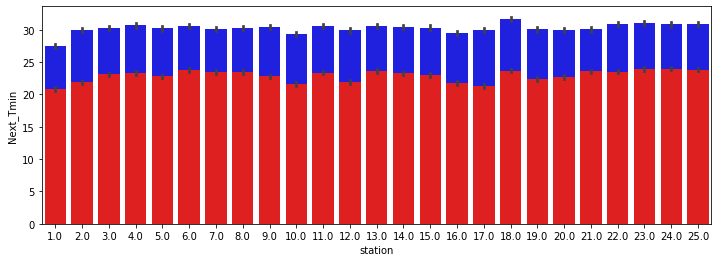

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(df['station'],df['Next_Tmax'],color='blue') 

sns.barplot(df['station'],df['Next_Tmin'],color='red')
plt.show()

# Both Min and Max Temps are following similar pattern with respect to Station

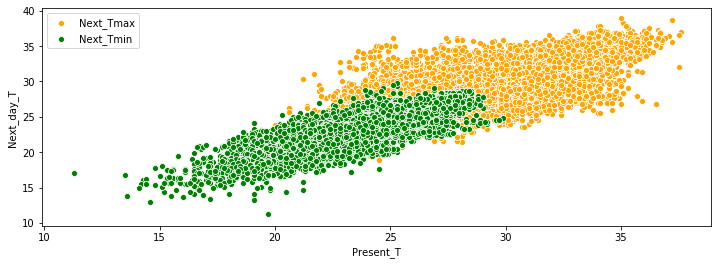

In [24]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Present_Tmax'],df['Next_Tmax'],color='orange')
sns.scatterplot(df['Present_Tmin'],df['Next_Tmin'],color='green')
plt.xlabel('Present_T')
plt.ylabel('Next_day_T')
plt.legend(['Next_Tmax', 'Next_Tmin'])
plt.show()
# Plotting Present v Next Day

In [25]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

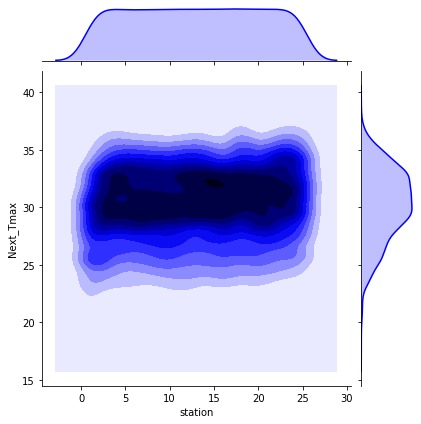

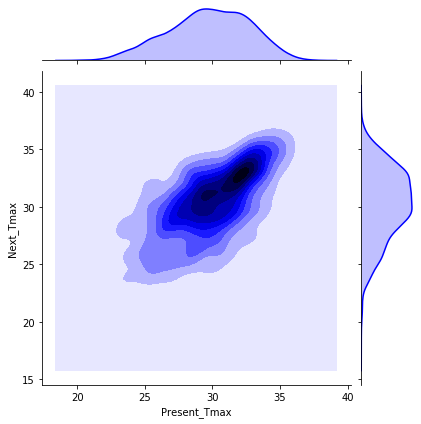

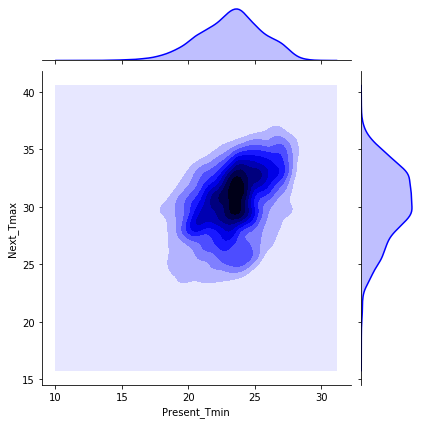

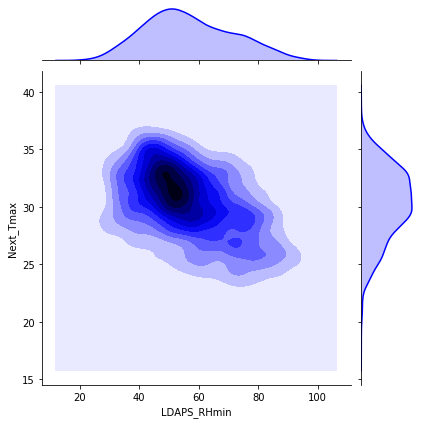

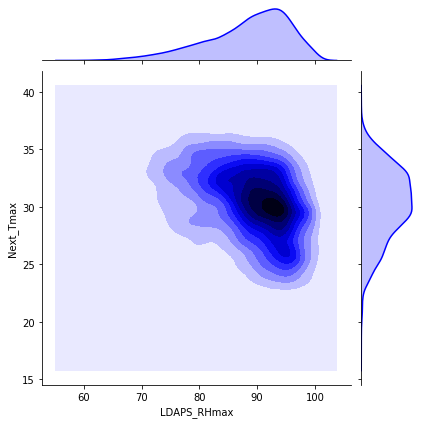

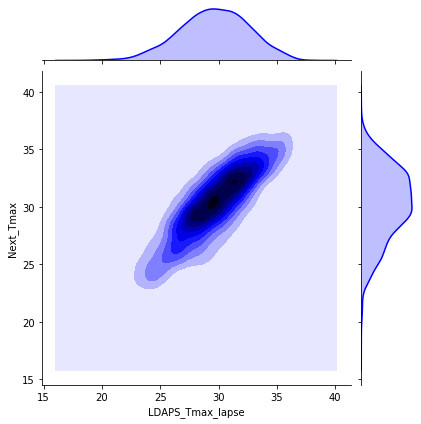

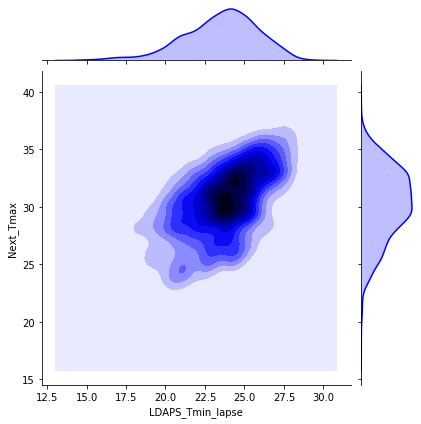

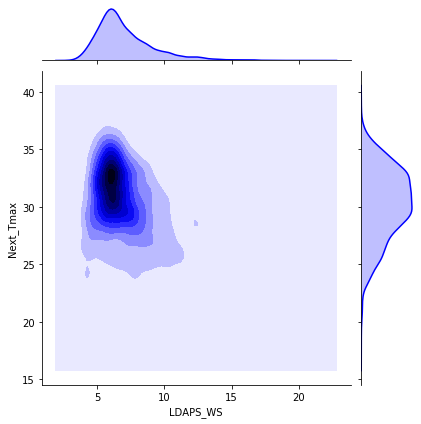

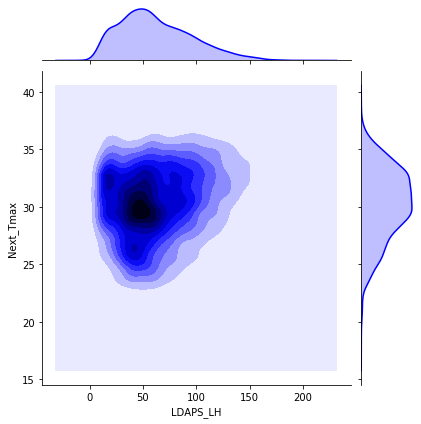

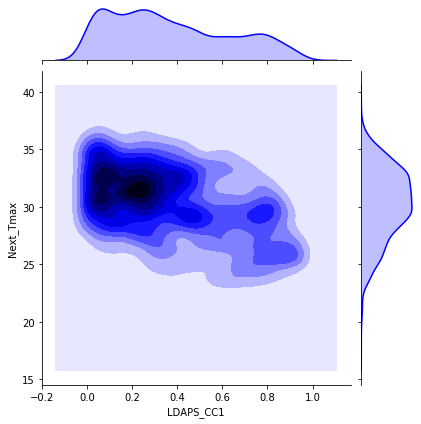

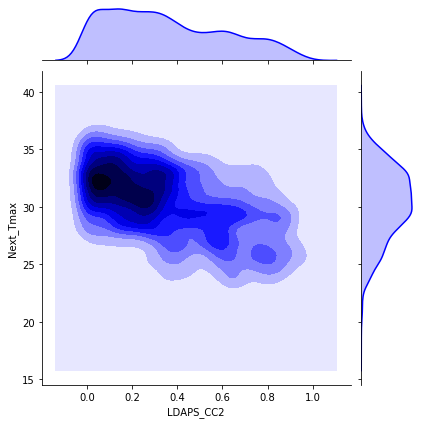

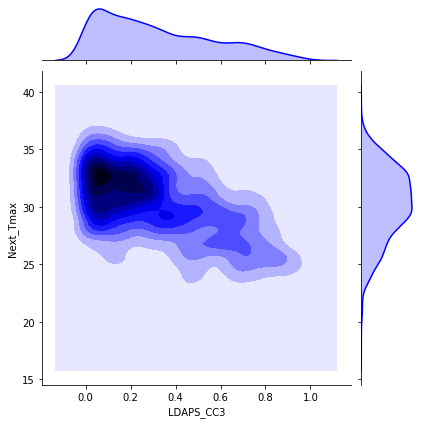

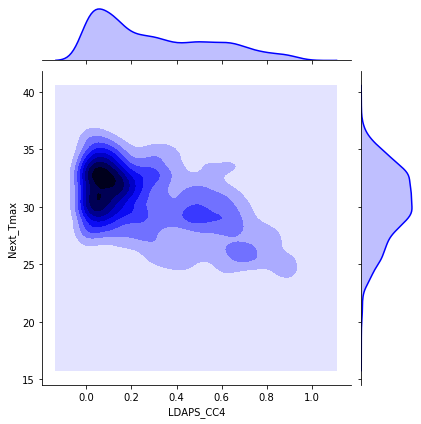

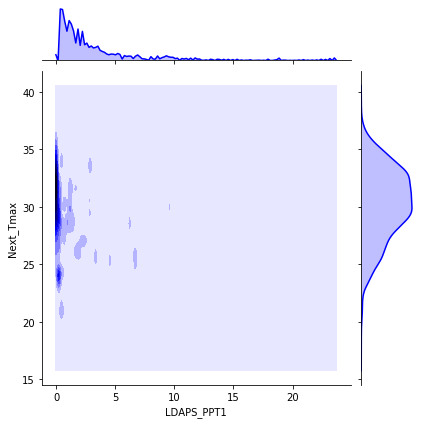

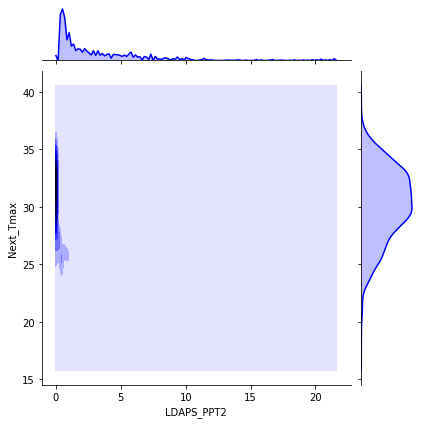

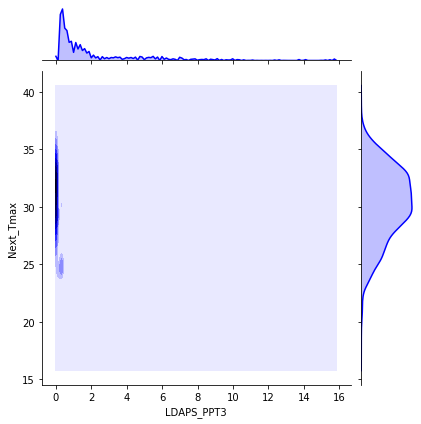

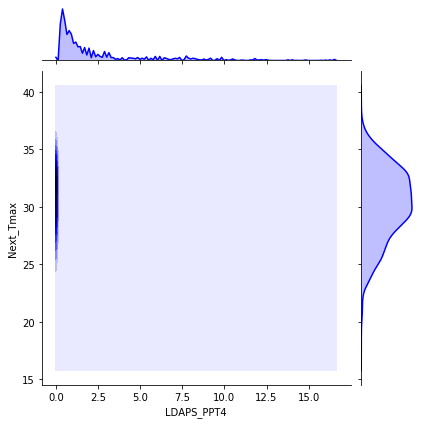

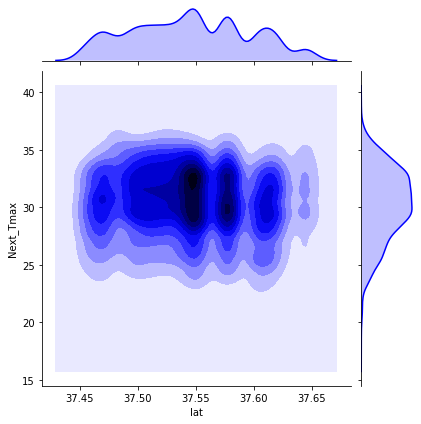

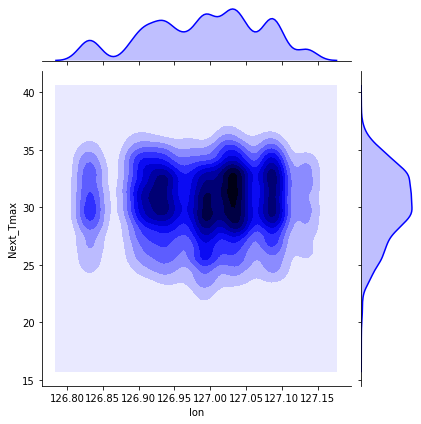

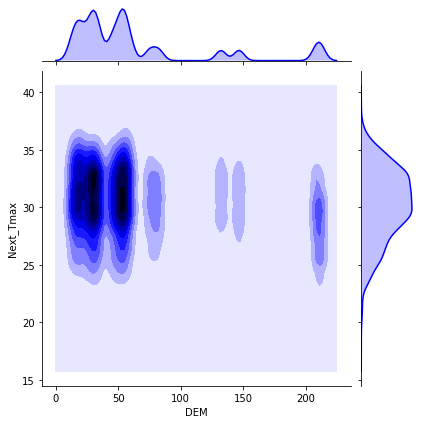

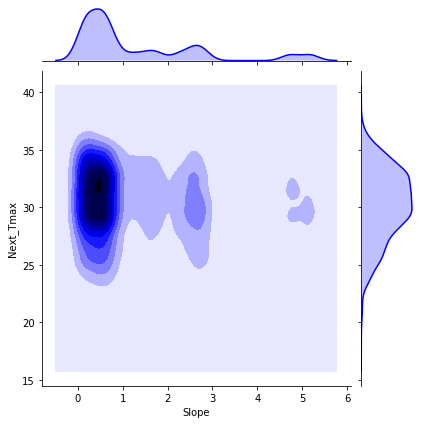

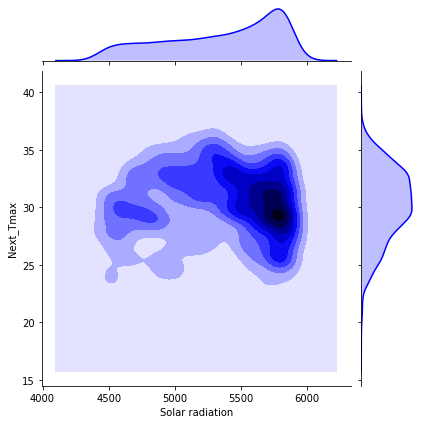

In [26]:
# Let's Look at all the jointplots w.r.t Next_Tmax v features
cols=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation']
for i in cols:
    sns.jointplot(x=i,y='Next_Tmax',data=df,color='blue',kind='kde')
    plt.show()

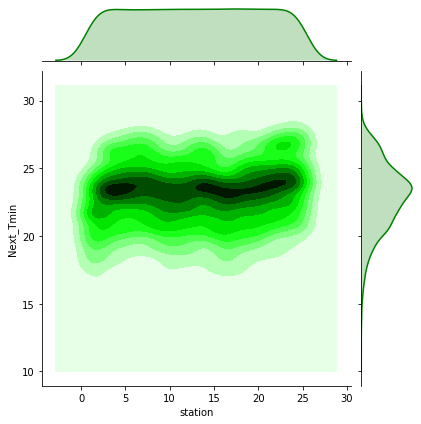

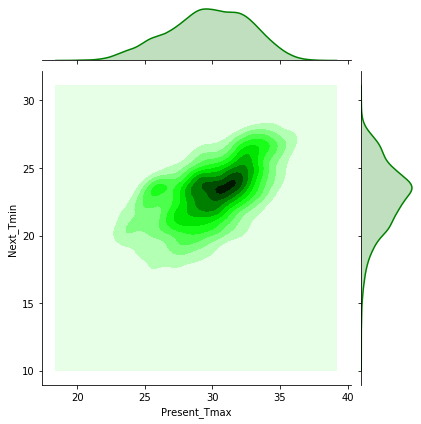

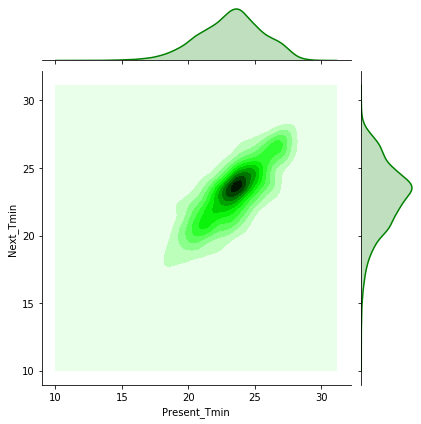

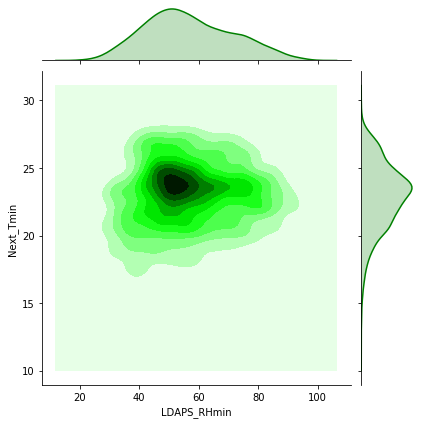

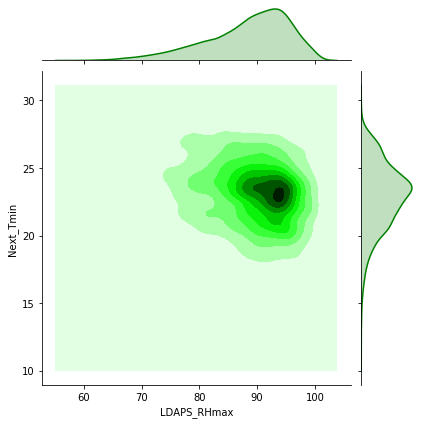

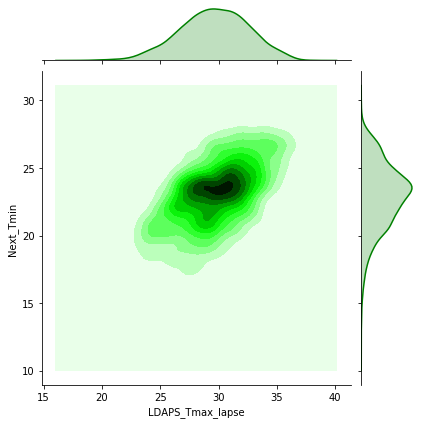

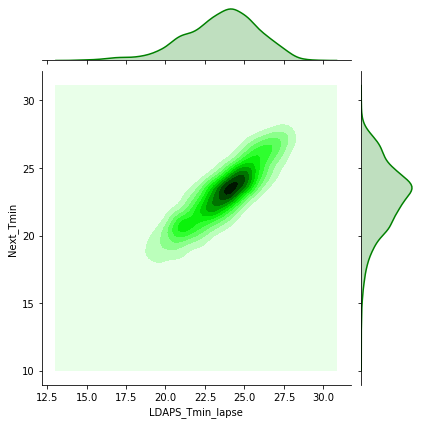

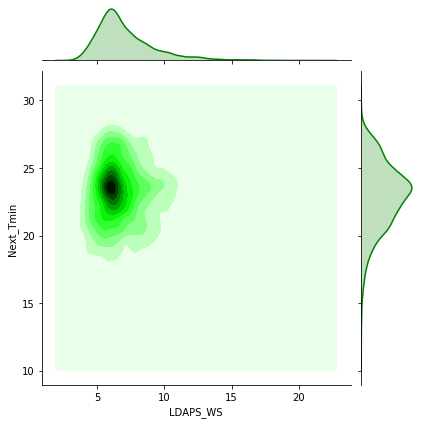

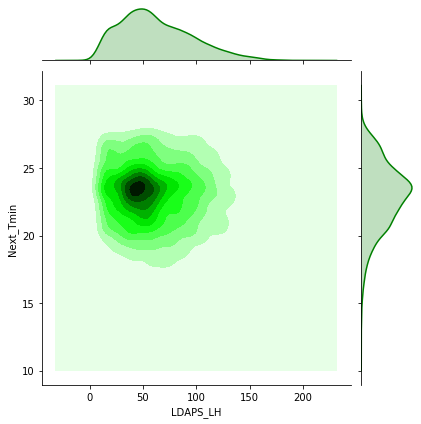

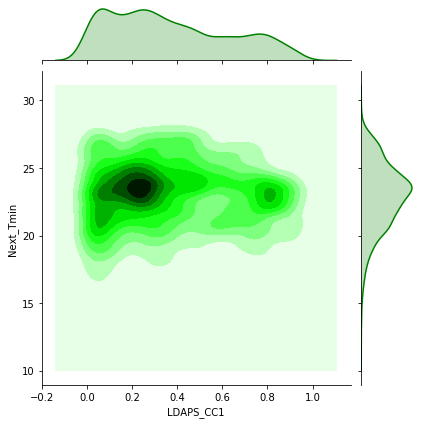

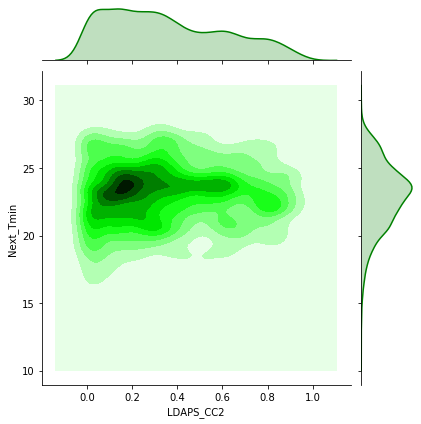

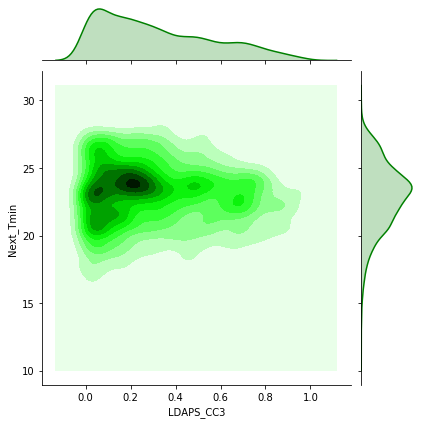

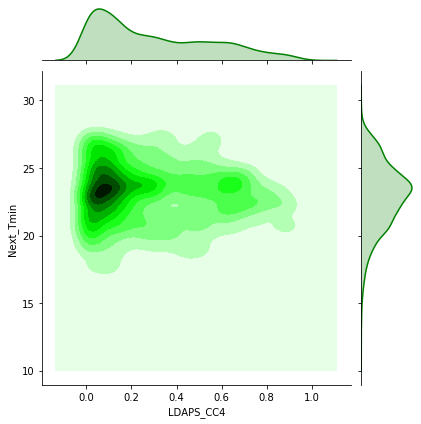

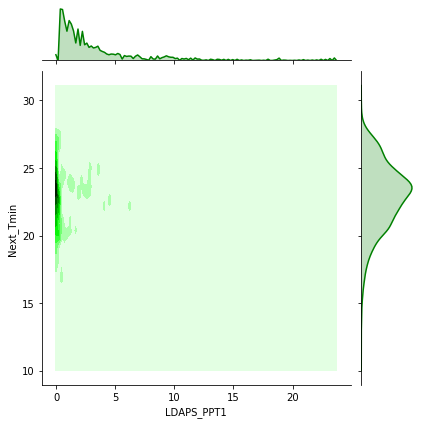

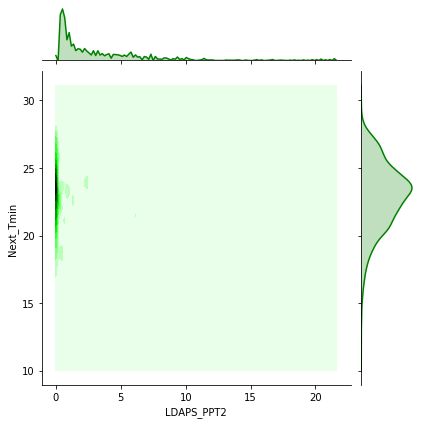

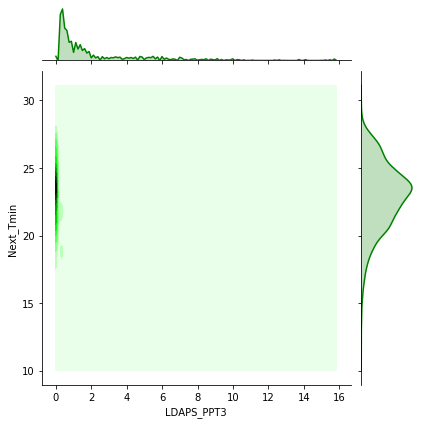

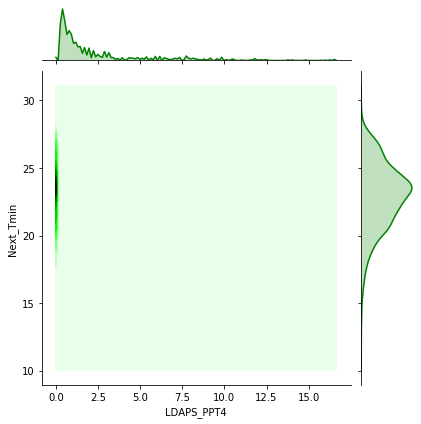

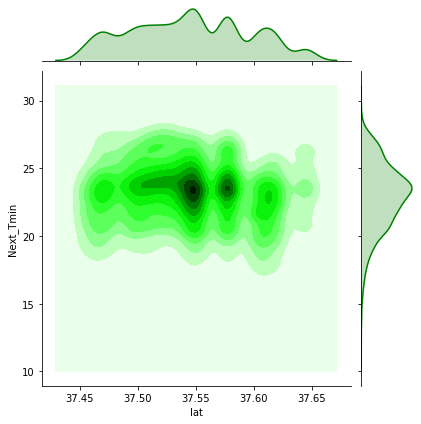

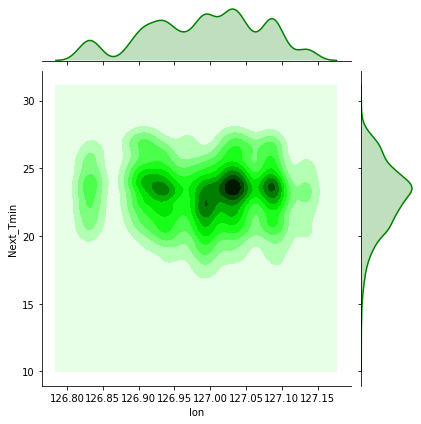

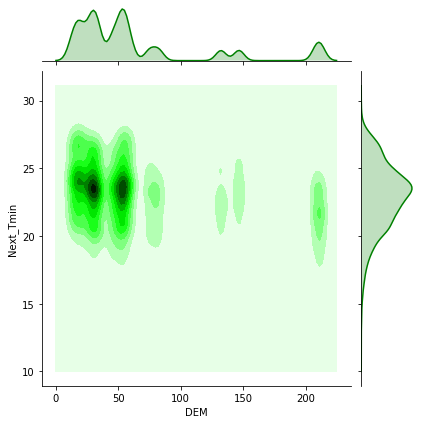

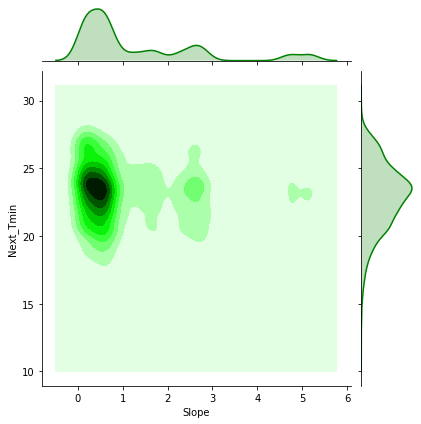

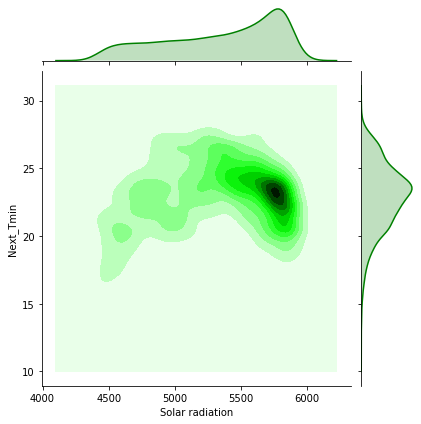

In [27]:
# Let's Look at all the jointplots w.r.t Next_Tmin v features
cols=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation']
for i in cols:
    sns.jointplot(x=i,y='Next_Tmin',data=df,color='green',kind='kde')
    plt.show()

In [28]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)
# Let's treat the outliers if any

(7588, 24)
(6739, 24)


In [31]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [32]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [33]:
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.513240
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.473278
LDAPS_LH           -0.270876
LDAPS_CC1           0.329077
LDAPS_CC2           0.505774
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [42]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [43]:
df.dropna(inplace=True)
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [44]:
# Let's Separate our dataset into Features and targets
df_x=df.drop(columns=["Next_Tmax","Next_Tmin"])
y_max=df[["Next_Tmax"]]
y_min=df[["Next_Tmin"]]

In [45]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.672567,-0.425700,-0.814500,0.196395,0.416672,-0.662880,-0.289974,0.092417,0.408632,-0.379706,...,-0.588310,-0.40175,-0.339228,-0.30398,-0.276791,1.211493,0.002950,2.091799,1.331482,1.543379
1,-1.533807,0.690139,-0.727830,-0.236316,0.339010,-0.016965,0.171305,-0.612724,-0.094193,-0.417455,...,-0.604343,-0.40175,-0.339228,-0.30398,-0.276791,1.211493,0.518720,-0.026183,-0.501985,1.249793
2,-1.395048,0.585529,0.008862,-0.494322,-0.627953,0.070512,0.409386,-0.320205,-1.446154,-0.490491,...,-0.532582,-0.40175,-0.339228,-0.30398,-0.276791,0.671747,0.845794,-0.422591,-0.859943,1.236117
3,-1.256289,0.725009,0.052197,0.195247,1.257724,-0.070068,-0.146736,-0.641138,0.310385,-0.458616,...,-0.571727,-0.40175,-0.339228,-0.30398,-0.276791,2.019113,0.392922,0.002192,1.194627,1.220460
4,-1.117529,0.515789,-0.597826,0.046081,0.271129,-0.284827,-0.074811,-0.583629,1.243193,-0.760531,...,-0.396085,-0.40175,-0.339228,-0.30398,-0.276791,0.134000,1.814435,-0.354858,-0.513383,1.226606


# Modelling

In [38]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [39]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

array([[-0.06855892,  2.66115946, -2.19713433, ..., -0.14295464,
         0.04923725,  0.40572667],
       [-0.89840046,  0.62157774, -0.95984354, ..., -0.34845671,
         0.12075938,  0.33173513],
       [-1.17899227, -0.42701871, -0.12304951, ..., -0.21492696,
         0.08103791,  0.36180693],
       ...,
       [-2.50160733,  3.25315454,  4.34668722, ...,  0.21368507,
        -0.45039478,  0.6539615 ],
       [-2.6552863 ,  3.0028985 ,  4.45727221, ...,  0.25767862,
        -0.42631344,  0.51602973],
       [-2.65936596,  2.87154969,  4.77648033, ...,  0.10146457,
        -0.18466637,  0.19093069]])

In [47]:
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_

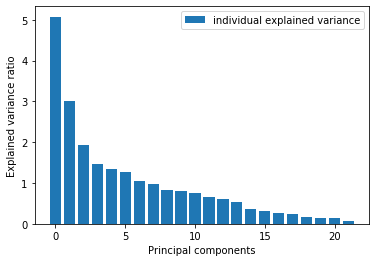

In [49]:
plt.bar(range(22),explained_variance, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()

In [52]:
pca_modified=PCA(n_components=17)
x=pca_modified.fit_transform(x)

# Part 1 Next_Tmax 

In [54]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y_max)

max r2 score corresponding to  43  is  0.7688142851279963


In [55]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y_max)
clf.best_params_

{'n_estimators': 500}

In [65]:
rfr=RandomForestRegressor(n_estimators=500)
x_train, x_test, y_train, y_test = train_test_split(x, y_max,random_state = 42,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [66]:
# Random Forest result
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.2822438309417334
r2_score is:  0.8013830160289742


In [60]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y_max)
clf.best_params_

{'n_neighbors': 19}

In [61]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y_max)

max r2 score corresponding to  71  is  0.8034133899167352


In [62]:
# SVM

from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y_max)
clf.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [63]:
svr=SVR(kernel="linear",C=.01)
r_state=maxr2_score(svr,x,y_max) 

max r2 score corresponding to  43  is  0.7663141384278102


# Cross Validation

In [68]:
print("\n\nLinear Regression\n\n")
model_evaluation(lr,x,y_max)

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y_max)


print("\n\nKNeighborsRegressor\n\n")
model_evaluation(knr,x,y_max)

print("\n\nSVM REGRESSOR\n\n")
model_evaluation(svr,x,y_max)



Linear Regression


Mean r2 score for regressor:  0.6888677454178315
standard deviation in r2 score for regressor:  0.05247041601956713
[0.75856275 0.62826178 0.65101478 0.74441229 0.66208713]


RandomForestRegressor


Mean r2 score for regressor:  0.6051909668303702
standard deviation in r2 score for regressor:  0.051703746785178854
[0.69049574 0.53150551 0.5947859  0.62118102 0.58798665]


KNeighborsRegressor


Mean r2 score for regressor:  0.5790190686826266
standard deviation in r2 score for regressor:  0.07389237510614331
[0.67990574 0.45658906 0.55213757 0.61414224 0.59232073]


SVM REGRESSOR


Mean r2 score for regressor:  0.6920878922294083
standard deviation in r2 score for regressor:  0.05472508647469343
[0.75199237 0.63132758 0.64630976 0.762896   0.66791377]


In [69]:
# SVM Regressor is the best model
x_train, x_test, y_train, y_test = train_test_split(x, y_max,random_state = 43,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.432121581405377
r2_score is:  0.7663141384278102


# Part 2 Next_Tmin

In [71]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y_min)

max r2 score corresponding to  70  is  0.8266854216712934


In [72]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y_min)
clf.best_params_

{'n_estimators': 500}

In [73]:
rfr=RandomForestRegressor(n_estimators=500)
x_train, x_test, y_train, y_test = train_test_split(x, y_min,random_state = 42,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
# Random Forest result
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.938198970184783
r2_score is:  0.838015688669358


In [74]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y_min)
clf.best_params_

{'n_neighbors': 18}

In [76]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y_min)

max r2 score corresponding to  83  is  0.8398729221177004


In [77]:
# SVM

from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y_min)
clf.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [78]:
svr=SVR(kernel="linear",C=.01)
r_state=maxr2_score(svr,x,y_min) 

max r2 score corresponding to  70  is  0.8254519002215046


# Cross Validation

In [80]:
print("\n\nLinear Regression\n\n")
model_evaluation(lr,x,y_min)

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y_min)


print("\n\nKNeighborsRegressor\n\n")
model_evaluation(knr,x,y_min)

print("\n\nSVM REGRESSOR\n\n")
model_evaluation(svr,x,y_min)



Linear Regression


Mean r2 score for regressor:  0.7583244707684074
standard deviation in r2 score for regressor:  0.08302303329595612
[0.69667458 0.63709923 0.76400828 0.85780964 0.83603063]


RandomForestRegressor


Mean r2 score for regressor:  0.7419178111889912
standard deviation in r2 score for regressor:  0.07573264858677513
[0.66414553 0.64418127 0.75919175 0.80966243 0.83240808]


KNeighborsRegressor


Mean r2 score for regressor:  0.6501932402802699
standard deviation in r2 score for regressor:  0.10006554860604709
[0.59262597 0.49590923 0.6654562  0.70730741 0.78966739]


SVM REGRESSOR


Mean r2 score for regressor:  0.7530194120976732
standard deviation in r2 score for regressor:  0.08673513845168436
[0.68880516 0.62619953 0.76033577 0.86034644 0.82941017]


In [81]:
# Choosing Linear Regression
x_train, x_test, y_train, y_test = train_test_split(x, y_min,random_state = 70,test_size=0.20)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [82]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.9999071955265306
r2_score is:  0.8266854216712934


In [83]:
import joblib
joblib.dump(svr,'Max.pkl')
joblib.dump(lr,'Min.pkl')

['Min.pkl']